# TME 3: Algorithme de descente de gradient

This algorithm aims to estimate local minimum $x^*$ of a convex function $f(x)$ (if exists).

A local minimum is a $\left\{x^*  \mathrel{}\middle|\mathrel{} f(x^*\pm\varepsilon) > f(x^)\right\}$ for a arbitrary small $\varepsilon$.

This algorythm iteratively follows the slope of a function for a fixed amourn $\epsilon$ sometimes referred to as the "learning rate" when searching for the optimal parameters $w^*$ minimizing a loss function over a dataset.

* initialize $\overline{x}_{0}$ with a random value.
* estimate  $\overline{x}_{t+1} = \overline{x}_{t}-\epsilon\nabla f(\overline{x}_{t})$
* if terminates if either converges or afer a maxumum $t$ steps.



In [2]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def make_grid(xmin=-5,xmax=5,ymin=-5,ymax=5,step=20,data=None):
    """ Cree une grille sous forme de matrice 2d de la liste des points
    :return: une matrice 2d contenant les points de la grille, la liste x, la liste y
    """
    if data is not None:
        xmax,xmin,ymax,ymin = np.max(data[:,0]),np.min(data[:,0]),\
                              np.max(data[:,1]),np.min(data[:,1])
    x,y = np.meshgrid(np.arange(xmin,xmax,(xmax-xmin)*1./step),
                      np.arange(ymin,ymax,(ymax-ymin)*1./step))
    grid=np.c_[x.ravel(),y.ravel()]
    return grid, x, y

def load_usps(filename):
    with open(filename,"r") as f:
        f.readline()
        data =[ [float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp = np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)


/home/mario/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in log
/home/mario/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log


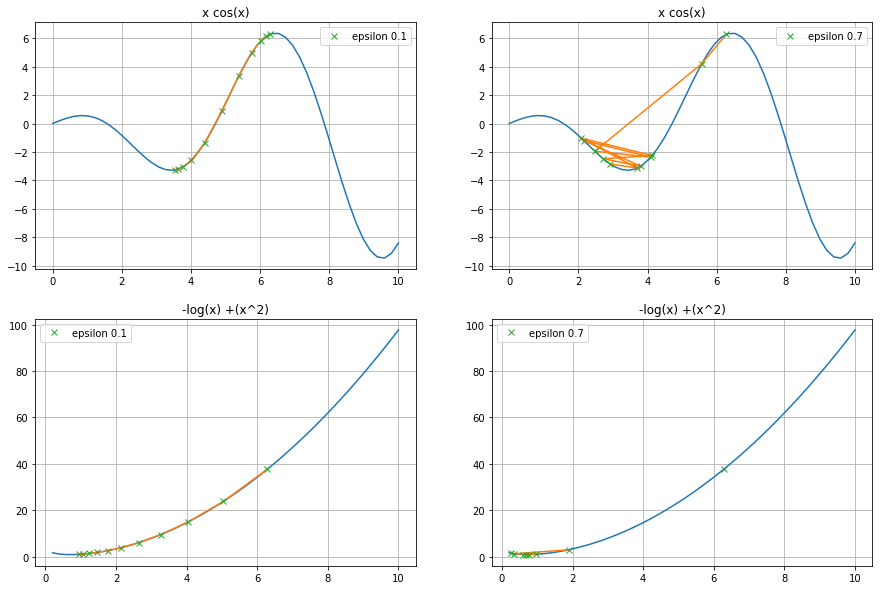

In [44]:
def test_function_1(x_t):
    return x_t * np.cos(x_t)

def test_d_function_1(x_t):
    return - x_t * np.sin(x_t) + np.cos(x_t)

def test_function_2(x_t):
    return - np.log(x_t) + x_t**2

def test_d_function_2(x_t):
    return - 1/x_t + 2*x_t

def test_function_3(x_t):
    x1,x2 = x_t
    return - 100* (x2 - x1**2)**2 + (1-x1)**2

def test_d_function_3(x_t):
    x1,x2 = x_t
    return np.array([100*(4*x1**3-4*x1*x2)+x1**2-2,100*(2*x2-2*x1**2)])

def descendt_gradient(nabla_f,x_t,eps):
    return eps*nabla_f(x_t)

def optimize(fonc,dfonc,xinit,eps,max_iter):
    x_histo = [x_init]
    f_histo = [fonc(x_init)]
    grad_histo = []
    for i in range(max_iter):
        x_t = x_histo[-1]
        grad_x_t = descendt_gradient(dfonc,x_t,eps)
        x_t_1 = x_t - grad_x_t
        f_histo += [fonc(x_t_1)]
        x_histo += [x_t_1]
        grad_histo += [grad_x_t]
    return x_histo, f_histo, grad_histo

x_init = 6.28
eps = 0.7
steps = 10

x_xcosx_eps_big_histo, fxcosx_eps_big_histo, grad_histo = optimize(test_function_1,test_d_function_1,x_init,eps,steps)
xx = np.linspace(0,10,num=50)
fxcosx_eps_big = map(test_function_1,xx)

x_logx_eps_big_histo, flogx_eps_big_histo, grad_histo = optimize(test_function_2,test_d_function_2,x_init,eps,steps)
xx = np.linspace(0,10,num=50)
flogx_eps_big = map(test_function_2,xx)

eps = 0.1

x_xcosx_eps_little_histo, fxcosx_eps_little_histo, grad_histo = optimize(test_function_1,test_d_function_1,x_init,eps,steps)
xx = np.linspace(0,10,num=50)
fxcosx_eps_little = map(test_function_1,xx)

x_logx_eps_little_histo, flogx_eps_little_histo, grad_histo = optimize(test_function_2,test_d_function_2,x_init,eps,steps)
xx = np.linspace(0,10,num=50)
flogx_eps_little = map(test_function_2,xx)

f, axarr = plt.subplots(2, 2,figsize=(15,10))

axarr[0,0].plot(xx,fxcosx_eps_little,label="epsilon %.0f" % 0.1)
axarr[0,0].plot(x_xcosx_eps_little_histo, fxcosx_eps_little_histo)
plot = axarr[0,0].plot(x_xcosx_eps_little_histo, fxcosx_eps_little_histo, "x",label="epsilon 0.1")
axarr[0,0].set_title("x cos(x)")
axarr[0,0].grid(True)
axarr[0,0].legend(handles=plot)

axarr[0,1].plot(xx,fxcosx_eps_big)
axarr[0,1].plot(x_xcosx_eps_big_histo, fxcosx_eps_big_histo)
plot = axarr[0,1].plot(x_xcosx_eps_big_histo, fxcosx_eps_big_histo, "x",label="epsilon 0.7")
axarr[0,1].set_title("x cos(x)")
axarr[0,1].grid(True)
axarr[0,1].legend(handles=plot)

axarr[1,1].plot(xx,flogx_eps_big)
axarr[1,1].plot(x_logx_eps_big_histo, flogx_eps_big_histo)
plot = axarr[1,1].plot(x_logx_eps_big_histo, flogx_eps_big_histo, "x",label="epsilon 0.7")
axarr[1,1].set_title("-log(x) +(x^2)")
axarr[1,1].grid(True)
axarr[1,1].legend(handles=plot)

axarr[1,0].plot(xx,flogx_eps_little)
axarr[1,0].plot(x_logx_eps_little_histo, flogx_eps_little_histo)
plot = axarr[1,0].plot(x_logx_eps_little_histo, flogx_eps_little_histo, "x",label="epsilon 0.1")
axarr[1,0].set_title("-log(x) +(x^2)")
axarr[1,0].grid(True)
axarr[1,0].legend(handles=plot)

plt.show()
        

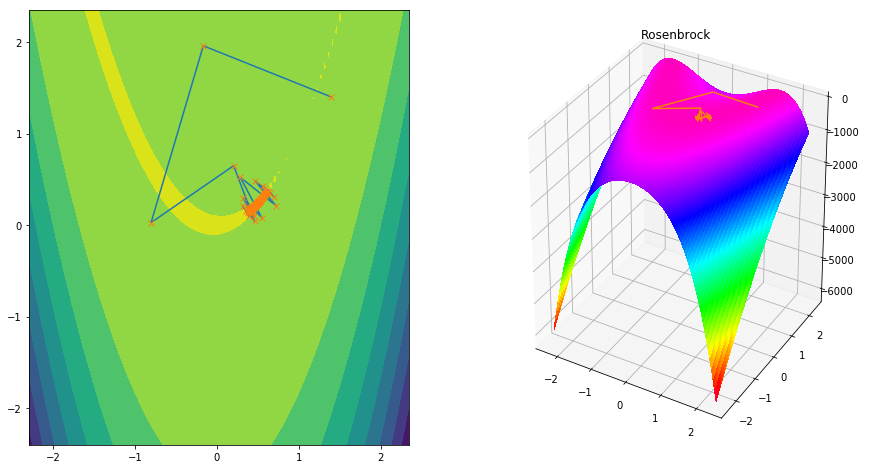

In [103]:
x_init = [1.4,1.4]
eps = 0.005
steps = 100
x_histo, f_histo, grad_histo = optimize(test_function_3,test_d_function_3,x_init,eps,steps)
x_1_histo = [ x for x,y in x_histo ]
x_2_histo = [ y for x,y in x_histo ]

def function_map(grid):
    return np.array(map(test_function_3,grid))
    
mafonction = function_map
grid,xx,yy = make_grid(-2.3,2.4,-2.4,2.4,100)


fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)
ax.contourf(xx,yy,mafonction(grid).reshape(xx.shape))
ax.plot(x_1_histo, x_2_histo)
ax.plot(x_1_histo, x_2_histo,'x')
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(xx, yy, mafonction(grid).reshape(xx.shape),rstride=1,cstride=1, cmap=cm.gist_rainbow, linewidth=0, antialiased=False)
ax.plot(x_1_histo,x_2_histo,f_histo)
ax.set_title("Rosenbrock")


plt.show()




# Regression Logistique

Binary Classification.

Classification rule: $ log \frac{P(+|x_{i})}{P(-|x_{i})} = wx_{i} > 0 $ then  $+ $ else $ - $.

In order to estimate $w$ we'll have to use the maximum likelihood.

$argmax_{w} L(X|P) =\nabla_{w} \prod_{i=0}^{n} P(Y|X) $

$argmax_{w} Llog(X|P) =\nabla_{w} \sum_{i=0}^{n} log P(Y|X)$ 

$P(Y|X) = \sigma((2Y-1)wx)$ with $Y \in {\{0,1\}}$

$argmax_{w} Llog(X|P) =\nabla_{w} \sum_{i=0}^{n} log \sigma((2y_{i}-1)wx_{i})$ 

$\nabla_{w} \sum_{i=0}^{n} log \sigma((2y_{i}-1)wx_{i}) = \sum_{i=0}^{n} (1 - \sigma((2y_{i}-1)wx_{i}))(2y_{i}-1)x_{i}$ 

* if $y_{i}=0$ then $(1-\sigma(-wx_{i}))-x_{i} = - \sigma(wx_{i})x_{i}$

    $w_{i+1} = w_{i} - \epsilon \sigma(wx_{i})x_{i}  $
    

* if $y_{i}=1$ then $(1-\sigma(wx_{i}))x_{i} = (1 - \sigma(wx_{i}))x_{i}$

    $w_{i+1} = w_{i} + \epsilon (1 - \sigma(wx_{i}))x_{i}  $

In [159]:
import numpy as np

def nabla_sigmoid(w,x,y):
    if y == 0:
        return -sigmoid(w.dot(x))*x
    else:
        return (1-sigmoid(w.dot(x)))*x

def sigmoid(x):
    return 1/1-np.exp(-x)

def Xdescendt_gradient(nabla_f,w_t,x_t,y_t,eps):
    return eps*nabla_f(w_t,x_t,y_t)

def optimize_logistic_regression(w_init,X_data,Y_data,eps=0.05,max_iter=20):
    w_histo = [w_init]
    grad_histo = []
    for i in range(max_iter):
        w_t = w_histo[-1]
        grad_w_t = Xdescendt_gradient(nabla_sigmoid,w_t,X_data[i],Y_data[i],eps)
        grad_w_t = grad_w_t/float(np.linalg.norm(grad_w_t))
        w_t_1 = w_t - grad_w_t
        w_histo += [w_t_1]
        grad_histo += [grad_w_t]
    return w_histo, grad_histo
    

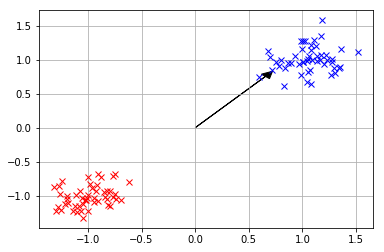

In [172]:

mu, sigma = 1, 0.2 # mean and standard deviation
X1 = np.random.normal(mu, sigma, 100).reshape((50,2))
mu, sigma = -1, 0.2 # mean and standard deviation
X2 = np.random.normal(mu, sigma, 100).reshape((50,2))
X = np.vstack((X1,X2))
#Y = (np.random.normal(mu, sigma, 500) > 0).astype(int)
Y = np.ones(100)
Y[:50] = 0
w_init = np.random.normal(mu, sigma,2)
w_histo, grad_histo = optimize_logistic_regression(w_init,X,Y)
w = grad_histo[-1]

plt.plot(X1[:,0], X1[:,1], 'bx')
plt.plot(X2[:,0], X2[:,1], 'rx')
plot = plt.arrow( 0,0,w[0],w[1], head_width=0.1, head_length=0.1, fc='k', ec='k', label="w direction")
plt.grid(True)
plt.show()
